<p align="center">
  <a href="https://imc.uc.cl" target="_blank">
    <img src="attachment:image.png" alt="IMC" width="220">
  </a>
</p>

# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---


## Tarea 04 – Aprendizaje automático

- **Fecha de Entrega:** 13 de noviembre de 2025, a las 23:59.
- **Fecha de publicación**: 30 de octubre de 2025.
- **Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 04 habilitado en Canvas.

## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

### 1.2 Pregunta de ciencia de datos

Esta tarea tendrá como objetivo crear un predictor que determine el éxito o fracaso de una expedición a distintas montañas del Himalayas según datos del montañista y de la expedición. Vamos a responder a la pregunta de qué tan bien pueden atributos como año, estación, montaña, edad del montañista, entre otros, predecir el éxito o fracaso de una expedición.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

[The Himalayan Database](https://www.himalayandatabase.com/) consiste en una colección de registros de expediciones en la cordillera del Himalaya. Esta contiene información detallada de las cimas más altas del mundo, junto con miles de expediciones realizadas desde 1905 hasta 2024 e información de cada uno de los/las montañistas que han participado en ellas. (El dataset que utilizaremos fue extraído desde: https://mavenanalytics.io/data-playground/himalayan-expeditions)

Descargue el archivo `Himalayan+Expeditions.zip` disponible en el repositorio del curso. Como puede ver, esta información está separada en varios archivos `.csv`. Deberá utilizar las herramientas aprendidas durante el curso para juntar esta información, procesarla y crear un predictor que determine el éxito de una subida.

**Recomendación**: Puede revisar el archivo `himalayan_data_dictionary.csv` para saber el significado de cada una de las columnas de la base de datos.

### 2.1 Librerías

Para esta tarea puede utilizar cualquiera de las librerías previamente utilizadas en el curso. Puede agregar otras si lo estima conveniente para el desarrollo de la Tarea.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# ...agreuge otras librerías si lo considera relevante

## 3. Carga y limpieza (1 punto)

### 3.1 DataFrame unificado (0.2 pts)

Inspeccione los atributos de cada dataset y extraiga la siguiente información de ellos:

1. Información de las montañas:
    * ID de la cima (`peakid`)
    * Nombre común de la montaña (`pkname`)
    * Altura (m) (`heightm`)
    * Cantidad de expediciones exitosas (`success_exp`)
    * Cantidad de expediciones fallidas (`failed_exp`)

2. Información de las expediciones:
    * ID de la expedición (`expid`)
    * Año (`year`)
    * Estación del año (`season`)

3. Información de los montañistas:
    * ID del miembro (`memid`)
    * Sexo (`sex`)
    * Año de nacimiento (`yob`)
    * Nacionalidad (`citizen`)
    * Completó la expedición exitosamente (`msuccess`)

Genere un único DataFrame con todos estos atributos, donde cada fila represente el ascenso de un/a montañista en una expedición. (Ojo que esto no necesariamente significa que cada fila será una persona diferente: si una persona escaló dos cumbres distintas en dos expediciones, esta debería aparecer en su DataFrame como dos filas separadas.)


In [111]:
peaks_df = pd.read_csv('data/peaks.csv')
exped_df = pd.read_csv('data/exped.csv', low_memory=False)
members_df = pd.read_csv('data/members.csv', low_memory=False)

exped_df['is_success'] = exped_df['termreason'].str.startswith('Success', na=False)
peak_stats = exped_df.groupby('peakid')['is_success'].agg(
    success_exp=lambda x: x.sum(),
    failed_exp=lambda x: (x == False).sum()
).reset_index()

peaks_info = peaks_df[['peakid', 'pkname', 'heightm']]

peaks_full_info = pd.merge(peaks_info, peak_stats, on='peakid', how='left')
peaks_full_info[['success_exp', 'failed_exp']] = peaks_full_info[['success_exp', 'failed_exp']].fillna(0).astype(int)

exped_info = exped_df[['expid', 'peakid', 'year', 'season']]

members_info = members_df[['expid', 'membid', 'sex', 'yob', 'citizen', 'msuccess']]
members_info = members_info.rename(columns={'membid': 'memid'})

df_merged = pd.merge(members_info, exped_info, on='expid')
df_final = pd.merge(df_merged, peaks_full_info, on='peakid')

final_cols = [
    'memid', 'sex', 'yob', 'citizen', 'msuccess',
    'expid', 'year', 'season',
    'peakid', 'pkname', 'heightm', 'success_exp', 'failed_exp'
]
df_final = df_final[final_cols]

df_final


,memid,sex,yob,citizen,msuccess,expid,year,season,peakid,pkname,heightm,success_exp,failed_exp
0,2,M,1972.0,Australia,False,AMAD01101,2001,Spring,AMAD,Ama Dablam,6814,1123,453
1,1,M,1968.0,Australia,False,AMAD01101,2001,Spring,AMAD,Ama Dablam,6814,1123,453
2,3,M,1960.0,Australia,False,AMAD01101,2001,Spring,AMAD,Ama Dablam,6814,1123,453
3,4,M,1966.0,Australia,False,AMAD01101,2001,Spring,AMAD,Ama Dablam,6814,1123,453
4,5,F,1970.0,Australia,False,AMAD01101,2001,Spring,AMAD,Ama Dablam,6814,1123,453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89084,2,M,1944.0,UK,False,SURM74101,1974,Spring,SURM,Surma-Sarovar North,6564,1,3
89085,3,M,NaN,UK,False,SURM74101,1974,Spring,SURM,Surma-Sarovar North,6564,1,3
89086,4,M,1948.0,UK,False,SURM74101,1974,Spring,SURM,Surma-Sarovar North,6564,1,3
89087,5,M,NaN,UK,False,SURM74101,1974,Spring,SURM,Surma-Sarovar North,6564,1,3


### 3.2 Limpieza y transformación (0.2 pts)

Inspeccione y procese su DataFrame para generar uno nuevo llamado `clean_df`. En esta sección usted debe decidir si es necesario:

* Limpiar valores nulos, duplicados o inválidos.
* Imputar valores.
* Transformar tipos de columnas.

Justifique su procesamiento.

In [112]:
# respuestas
df_clean = df_final.copy()
df_clean.isnull().sum()


memid             0
sex               0
yob            5424
citizen           7
msuccess          0
expid             0
year              0
season            0
peakid            0
pkname            0
heightm           0
success_exp       0
failed_exp        0
dtype: int64

Se ve un gran numero de valores nulos sobretodo en el "YOB" los cuales se decidiran quitar ya que son un numero considerablemente alto y no se podra imputar un valor en su lugar.

In [113]:
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

memid          0
sex            0
yob            0
citizen        0
msuccess       0
expid          0
year           0
season         0
peakid         0
pkname         0
heightm        0
success_exp    0
failed_exp     0
dtype: int64

In [114]:
df_clean.duplicated().sum()

np.int64(0)

No se ven filas duplicadas por lo que no se realiza ninguna accion respecto a estas

In [115]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83665 entries, 0 to 89088
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   memid        83665 non-null  int64  
 1   sex          83665 non-null  object 
 2   yob          83665 non-null  float64
 3   citizen      83665 non-null  object 
 4   msuccess     83665 non-null  bool   
 5   expid        83665 non-null  object 
 6   year         83665 non-null  int64  
 7   season       83665 non-null  object 
 8   peakid       83665 non-null  object 
 9   pkname       83665 non-null  object 
 10  heightm      83665 non-null  int64  
 11  success_exp  83665 non-null  int64  
 12  failed_exp   83665 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 8.4+ MB


### 3.2 Creación de nuevas columnas (0.6 pts)

Vamos a crear un par de columnas nuevas que nos ayudarán a hacer una análisis exploratorio del dataset.
Utilizando las columnas actuales, genere y agregue las siguientes columnas a su DataFrame:

* `age`: Edad del montañista a la fecha de la expedición.
* `peak_success_p`: Porcentaje de expediciones exitosas de la cima respectiva.

De ser necesario, aplique procesos de limpieza y transformación a estas columnas también (asegúrese de que todos los valores sean coherentes).

In [116]:
df_picos = pd.read_csv('data/peaks.csv', on_bad_lines='skip')
df_clean = df_picos.copy()

columnas_a_eliminar = ['pkname2', 'phost', 'pcountry', 'psummiters', 'psmtnote']
df_clean.drop(columns=columnas_a_eliminar, inplace=True)
df_clean.drop_duplicates(inplace=True)

columnas_numericas = ['pyear', 'pmonth', 'pday']
for col in columnas_numericas:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

columnas_booleanas = ['open', 'unlisted', 'trekking']
for col in columnas_booleanas:
    df_clean[col] = df_clean[col].astype('bool')


df_exp_stats = pd.read_csv('data/peaks_with_exp.csv')
df_exp_stats['peak_success_p'] = (df_exp_stats['success_exp'] / (df_exp_stats['success_exp'] + df_exp_stats['failed_exp'])) * 100
df_exp_stats['peak_success_p'].fillna(0, inplace=True)
df_clean = pd.merge(df_clean, df_exp_stats[['peakid', 'peak_success_p']], on='peakid', how='left')


df_members = pd.read_csv('data/members.csv', on_bad_lines='skip')
df_exped = pd.read_csv('data/exped.csv')

df_members_rel = df_members[['expid', 'yob']]
df_exped_rel = df_exped[['expid', 'year']]
df_member_exped = pd.merge(df_members_rel, df_exped_rel, on='expid')
df_member_exped['yob'] = pd.to_numeric(df_member_exped['yob'], errors='coerce')
df_member_exped['year'] = pd.to_numeric(df_member_exped['year'], errors='coerce')
df_member_exped['age'] = df_member_exped['year'] - df_member_exped['yob']

# Preparar el DataFrame  edades individuales
df_member_age = df_member_exped[['expid', 'age']].dropna()
df_member_age['age'] = df_member_age['age'].astype(int)

df_con_edad = pd.merge(
    df_clean,
    df_member_age,
    left_on='pexpid',
    right_on='expid',
    how='left'
)

if 'expid' in df_con_edad.columns:
    df_con_edad.drop('expid', axis=1, inplace=True)
df_con_edad['age'] = df_con_edad['age'].astype('Int64')

C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\4193608637.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exp_stats['peak_success_p'].fillna(0, inplace=True)
C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\4193608637.py:23: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_members = pd.read_csv('data/members.csv', on_bad_lines='skip')
C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\4193608637.py:24: DtypeWarning: Columns (8,18,19) have mixed types. Specify 

In [117]:
df_con_edad.head()

,peakid,pkname,location,heightm,heightf,himal,region,open,unlisted,trekking,trekyear,restrict,pstatus,pyear,pseason,pmonth,pday,pexpid,peak_success_p,age
0,ACHN,Aichyn,Chandi Himal (SW of Changwathang),6055,19865,Nalakankar/Chandi/Changla,Kanjiroba-Far West,True,False,False,NaN,Opened in 2014,Climbed,2015.0,Autumn,NaN,3.0,ACHN15301,66.666667,23
1,ACHN,Aichyn,Chandi Himal (SW of Changwathang),6055,19865,Nalakankar/Chandi/Changla,Kanjiroba-Far West,True,False,False,NaN,Opened in 2014,Climbed,2015.0,Autumn,NaN,3.0,ACHN15301,66.666667,23
2,ACHN,Aichyn,Chandi Himal (SW of Changwathang),6055,19865,Nalakankar/Chandi/Changla,Kanjiroba-Far West,True,False,False,NaN,Opened in 2014,Climbed,2015.0,Autumn,NaN,3.0,ACHN15301,66.666667,25
3,ACHN,Aichyn,Chandi Himal (SW of Changwathang),6055,19865,Nalakankar/Chandi/Changla,Kanjiroba-Far West,True,False,False,NaN,Opened in 2014,Climbed,2015.0,Autumn,NaN,3.0,ACHN15301,66.666667,22
4,ACHN,Aichyn,Chandi Himal (SW of Changwathang),6055,19865,Nalakankar/Chandi/Changla,Kanjiroba-Far West,True,False,False,NaN,Opened in 2014,Climbed,2015.0,Autumn,NaN,3.0,ACHN15301,66.666667,20


## 4. EDA (2.5 puntos)

Con el dataset obtenido, responda las siguientes preguntas. Para cada una de ellas, realice al menos un gráfico que permita visualizar el comportamiento de su dataset.

a. **(0.5 pts)** ¿Cuántos ascensos exitosos y fallidos hay en su dataset? ¿A qué porcentaje del total corresponde cada categoría?

b. **(0.5 pts)** ¿Cómo se distribuyen las edades de los/las montañistas en la base de datos?

c. **(0.5 pts)** ¿Cómo se distribuye la cantidad de ascensos según estación del año? ¿Cuál es el porcentaje de éxito por estación? Muestre la cantidad de filas de ascensos exitosas y fallidas para cada estación.

d. **(0.5 pts)** ¿Cómo cambia la cantidad de ascensos en el tiempo? Muestre la cantidad de ascensos exitosos y fallidos por año.

e. **(0.5 pts)** ¿Existe una correlación entre el porcentaje de éxito de ascenso y la altura de una cumbre? Haga un scatterplot para todas las cumbres que hayan sido escaladas por al menos 10 expediciones en total (tanto fallidas como exitosas).

- Total de ascensos exitosos: 6518
- Total de ascensos fallidos: 4907
- Porcentaje de éxito: 57.05%
- Porcentaje de fracaso: 42.95%


C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\1728556016.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Exitosos', 'Fallidos'], y=[total_exitosos, total_fallidos], ax=ax[0], palette=['#4CAF50', '#F44336'])


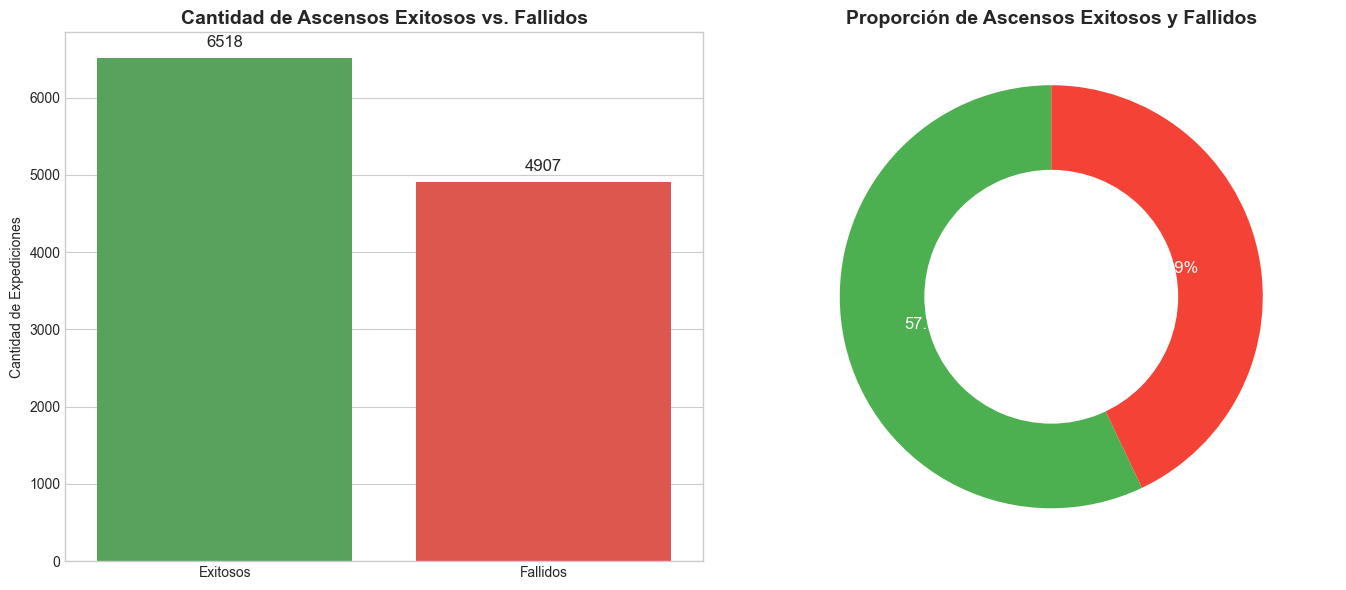

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns


df_exp_stats = pd.read_csv('data/peaks_with_exp.csv')

total_exitosos = df_exp_stats['success_exp'].sum()
total_fallidos = df_exp_stats['failed_exp'].sum()
total_ascensos = total_exitosos + total_fallidos

porcentaje_exitosos = (total_exitosos / total_ascensos) * 100
porcentaje_fallidos = (total_fallidos / total_ascensos) * 100

print(f"- Total de ascensos exitosos: {total_exitosos}")
print(f"- Total de ascensos fallidos: {total_fallidos}")
print(f"- Porcentaje de éxito: {porcentaje_exitosos:.2f}%")
print(f"- Porcentaje de fracaso: {porcentaje_fallidos:.2f}%")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=['Exitosos', 'Fallidos'], y=[total_exitosos, total_fallidos], ax=ax[0], palette=['#4CAF50', '#F44336'])
ax[0].set_title('Cantidad de Ascensos Exitosos vs. Fallidos', fontsize=14, weight='bold')
ax[0].set_ylabel('Cantidad de Expediciones')
for i, v in enumerate([total_exitosos, total_fallidos]):
    ax[0].text(i, v + 100, str(v), ha='center', va='bottom', fontsize=12)


labels = [f'Exitosos\n({porcentaje_exitosos:.1f}%)', f'Fallidos\n({porcentaje_fallidos:.1f}%)']
ax[1].pie(
    [total_exitosos, total_fallidos],
    labels=labels,
    colors=['#4CAF50', '#F44336'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12, 'color': 'white'}
)
ax[1].pie([1], colors=['white'], radius=0.6) # Círculo blanco para hacer un donut
ax[1].set_title('Proporción de Ascensos Exitosos y Fallidos', fontsize=14, weight='bold')


plt.tight_layout()
plt.show()

Respuesta A

Hay 6518 ascensos exitosos y 4907 ascensos fallidos, esto representando 57,05% y 42,95% respectivamente.

Estadísticas descriptivas de la edad de los montañistas:
count       1941.0
mean     36.748068
std      11.875163
min           14.0
25%           28.0
50%           34.0
75%           43.0
max           84.0
Name: age, dtype: Float64


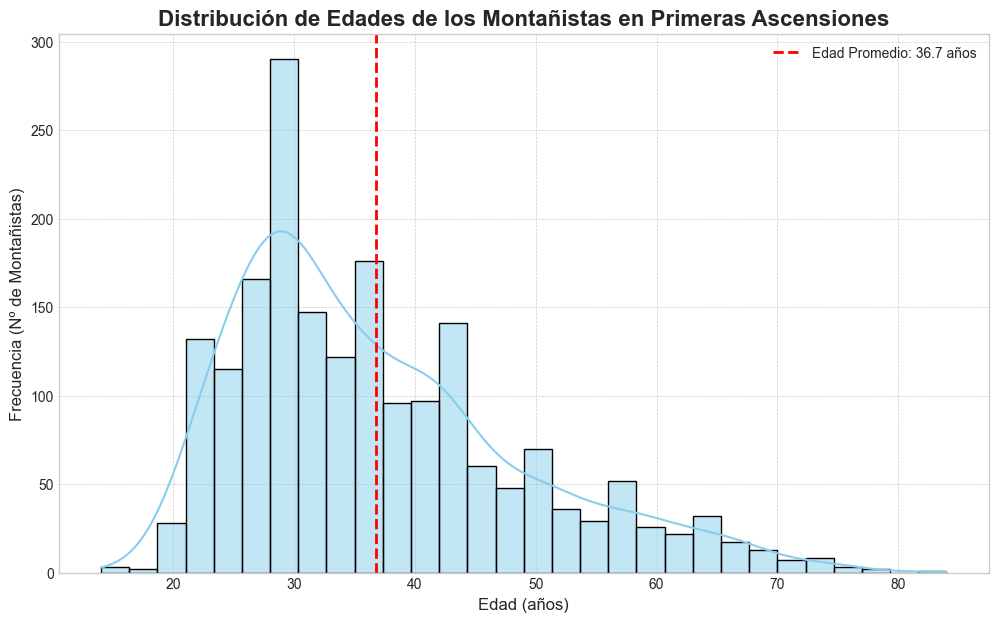

In [119]:
edades = df_con_edad['age'].dropna()

print("Estadísticas descriptivas de la edad de los montañistas:")
print(edades.describe())

plt.figure(figsize=(12, 7))
sns.histplot(edades, bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribución de Edades de los Montañistas en Primeras Ascensiones', fontsize=16, weight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Frecuencia (Nº de Montañistas)', fontsize=12)
plt.axvline(edades.mean(), color='red', linestyle='--', linewidth=2, label=f'Edad Promedio: {edades.mean():.1f} años')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Las edades se distribuyen con mayoria entre 30 y 40 años, con una edad promedio de 36.7 años.

C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\452157772.py:1: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_exped = pd.read_csv('data/exped.csv')
C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\452157772.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total', data=ascensos_por_estacion, ax=ax[0], palette='viridis', order=['Spring', 'Summer', 'Autumn', 'Winter'])


    season  total  exitosos  fallidos  porcentaje_exito
0   Autumn   5634      3080      2554         54.668087
1   Spring   5334      3083      2251         57.799025
2   Summer    115        44        71         38.260870
3  Unknown      2         0         2          0.000000
4   Winter    340       150       190         44.117647


C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\452157772.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='porcentaje_exito', data=ascensos_por_estacion, ax=ax[1], palette='plasma', order=['Spring', 'Summer', 'Autumn', 'Winter'])


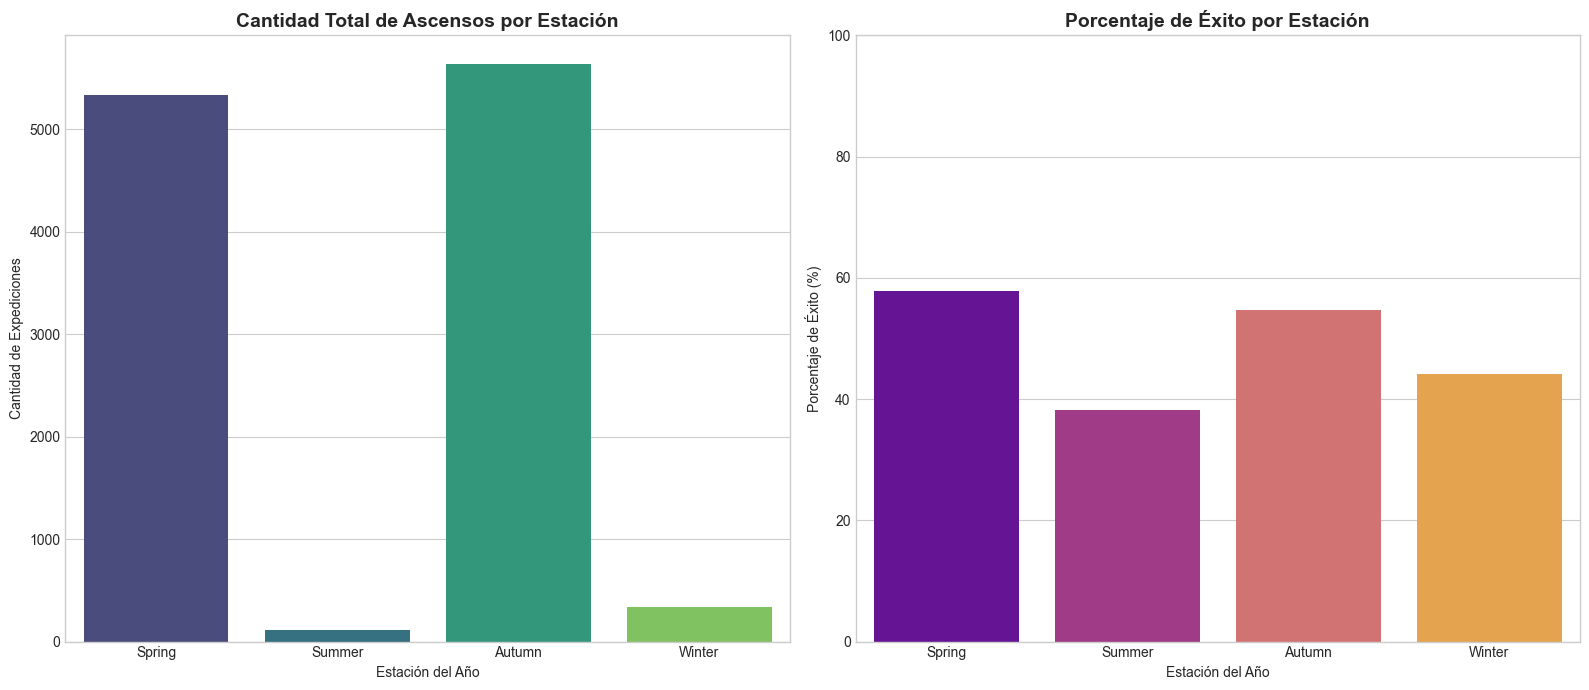

In [120]:
df_exped = pd.read_csv('data/exped.csv')


df_exped['exito'] = df_exped[['success1', 'success2', 'success3', 'success4']].any(axis=1)

ascensos_por_estacion = df_exped.groupby('season')['exito'].agg(
    total='count',
    exitosos=lambda x: x.sum(),
    fallidos=lambda x: (x == False).sum()
).reset_index()

ascensos_por_estacion['porcentaje_exito'] = (ascensos_por_estacion['exitosos'] / ascensos_por_estacion['total']) * 100


print(ascensos_por_estacion)


fig, ax = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(x='season', y='total', data=ascensos_por_estacion, ax=ax[0], palette='viridis', order=['Spring', 'Summer', 'Autumn', 'Winter'])
ax[0].set_title('Cantidad Total de Ascensos por Estación', fontsize=14, weight='bold')
ax[0].set_xlabel('Estación del Año')
ax[0].set_ylabel('Cantidad de Expediciones')

sns.barplot(x='season', y='porcentaje_exito', data=ascensos_por_estacion, ax=ax[1], palette='plasma', order=['Spring', 'Summer', 'Autumn', 'Winter'])
ax[1].set_title('Porcentaje de Éxito por Estación', fontsize=14, weight='bold')
ax[1].set_xlabel('Estación del Año')
ax[1].set_ylabel('Porcentaje de Éxito (%)')
ax[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

Respuesta C

existe una clara mayoria en las estaciones de otoño y de primavera, en desmedro de las otras 2 estaciones restantes (invierno y verano). aunque su porcentaje de exito no demuestra las mismas preferencias, siendo estas mas equilibradas


Primeros 5 años del registro:
   year  exitosos  fallidos
0  1905         0         1
1  1907         0         1
2  1909         1         1
3  1910         1         2
4  1920         0         3

Últimos 5 años del registro:
    year  exitosos  fallidos
92  2020        17         5
93  2021       124        83
94  2022       188        91
95  2023       218        56
96  2024        81        19


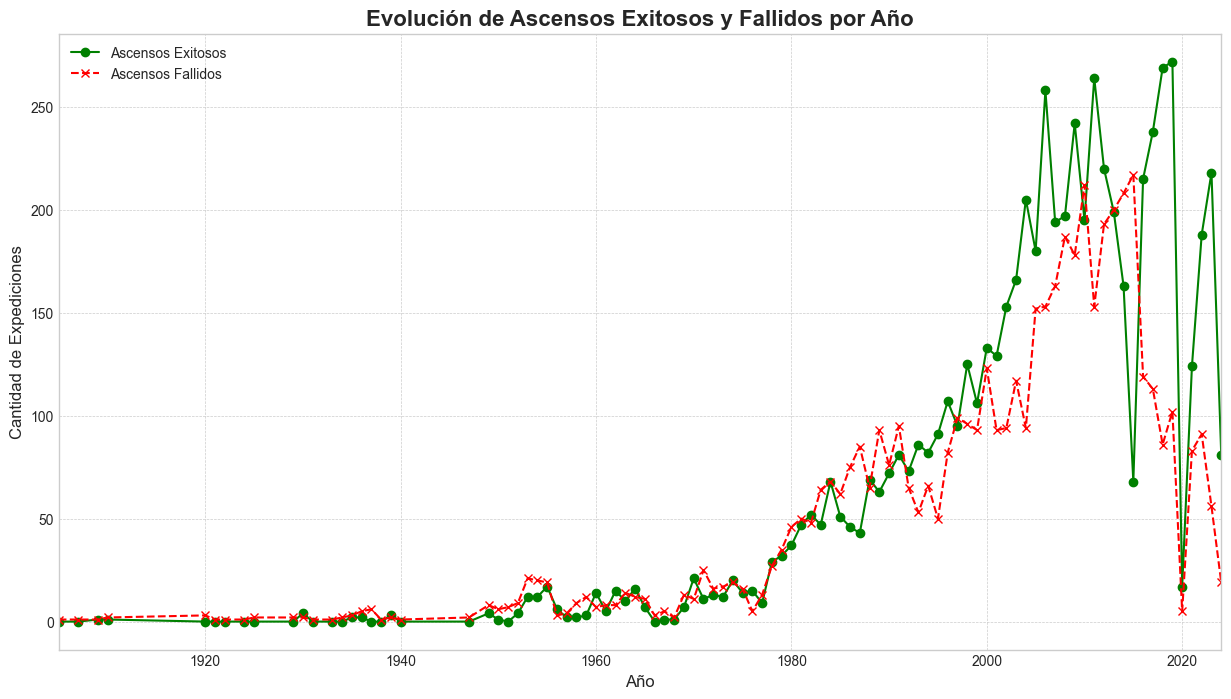

In [121]:

ascensos_por_ano = df_exped.groupby('year')['exito'].agg(
    exitosos='sum',
    fallidos=lambda x: (x == False).sum()
).reset_index()

print("Primeros 5 años del registro:")
print(ascensos_por_ano.head())
print("\nÚltimos 5 años del registro:")
print(ascensos_por_ano.tail())

plt.figure(figsize=(15, 8))

plt.plot(ascensos_por_ano['year'], ascensos_por_ano['exitosos'], marker='o', linestyle='-', color='green', label='Ascensos Exitosos')
plt.plot(ascensos_por_ano['year'], ascensos_por_ano['fallidos'], marker='x', linestyle='--', color='red', label='Ascensos Fallidos')

plt.title('Evolución de Ascensos Exitosos y Fallidos por Año', fontsize=16, weight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Expediciones', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(ascensos_por_ano['year'].min(), ascensos_por_ano['year'].max())
plt.show()

Respuesta D

Se aprecia que desde los años 80 la cantidad de ascensos en general aumento considerablemente, y las proporciones netre exitos y fracasos se mantienen relativamente iguales.


C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\787109336.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


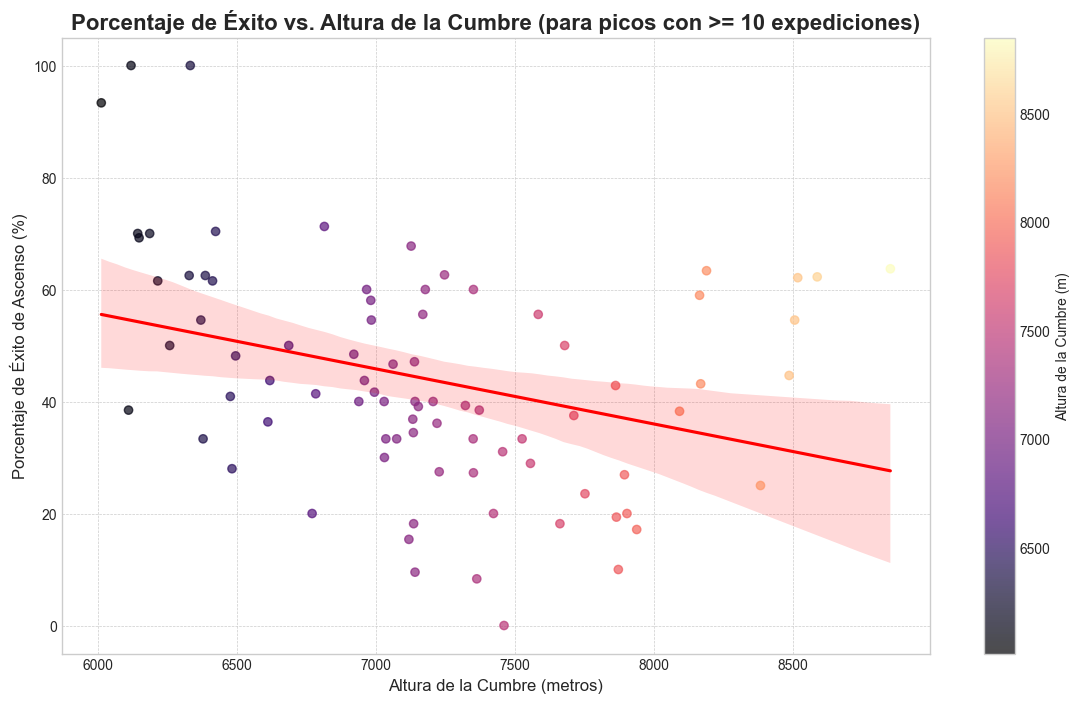


La correlación de Pearson es: -0.332


In [122]:
df_exp_stats = pd.read_csv('data/peaks_with_exp.csv')
df_exp_stats['total_exp'] = df_exp_stats['success_exp'] + df_exp_stats['failed_exp']

df_analisis_altura = pd.merge(df_clean, df_exp_stats[['peakid', 'total_exp']], on='peakid', how='left')

df_filtrado = df_analisis_altura[df_analisis_altura['total_exp'] >= 10].copy()

df_filtrado.drop_duplicates(subset='peakid', inplace=True)

plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    df_filtrado['heightm'],
    df_filtrado['peak_success_p'],
    alpha=0.7,
    c=df_filtrado['heightm'],
    cmap='magma'
)

sns.regplot(x='heightm', y='peak_success_p', data=df_filtrado, scatter=False, color='red', line_kws={'label': 'Línea de Tendencia'})

plt.colorbar(scatter, label='Altura de la Cumbre (m)')
plt.title('Porcentaje de Éxito vs. Altura de la Cumbre (para picos con >= 10 expediciones)', fontsize=16, weight='bold')
plt.xlabel('Altura de la Cumbre (metros)', fontsize=12)
plt.ylabel('Porcentaje de Éxito de Ascenso (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

correlacion = df_filtrado['heightm'].corr(df_filtrado['peak_success_p'])
print(f"\nLa correlación de Pearson es: {correlacion:.3f}")

Se aprecia que la relacion entre ascensos ecitosos y la altura de las cumbres es lineal hacia abajo (es decir, a mayor altura de la cumbra, menor es la probabilidad de éxito).

## 5. Predictor (2.5 puntos)

Ahora veremos si la información que tenemos nos permite predecir el éxito de un ascenso por alguna persona en particular. Primero, defina su **X** (matriz de atributos) e **y** (etiqueta a predecir) de la siguiente manera:

* **X**: `age`, `sex`, `citizen`, `season`, `heightm`, `year`, `success_exp`, `failed_exp`
* **y**: `msuccess`

Luego, realice los pasos a continuación:

**5.1 Codificación y normalización (1 pto)**
* Codifique todas las columnas categóricas, de manera que su matriz **X** solo tenga valores numéricos.
* Divida sus datos en sets de entrenamiento y testeo. Use una división de 70-30.
* Normalice sus matrices de atributos. Justifique su método de normalización.

**5.2 Creación y entrenamiento de modelos (1 pto)**
* Cree y entrene los siguientes modelos:
    * Un clasificador KNN
    * Un árbol de decisión
    * Un clasificador de regresión logística
    * Un clasificador random forest **(Opcional)**

    Explique qué hiperparámetros utilizó para la creación de cada uno de ellos y qué valores le asignó.

* Finalmente, evalúe todos sus modelos con el set de testeo. Para cada uno, muestre
    * Accuracy
    * Precisión
    * Recall
    * Matriz de confusión

**5.3 Análisis de resultados (0.5 pts)**

Interprete, analice y comente sus resultados. 
* ¿Qué tendencias puede observar? ¿Se diferencian de alguna forma las predicciones entre un modelo y otro? 
* ¿Fue posible construir un predictor efectivo? Justique.



In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [127]:
# Cargar los datos
df_members = pd.read_csv('data/members.csv')
df_exped = pd.read_csv('data/exped.csv')
df_peaks = pd.read_csv('data/peaks.csv')
df_exp_stats = pd.read_csv('data/peaks_with_exp.csv')

# unir expediciones con peaks (para obtener heightm y peakid)
df_model = pd.merge(df_exped[['expid', 'peakid', 'year', 'season']], 
                     df_peaks[['peakid', 'heightm']], 
                     on='peakid', how='left')

# unir con members
df_model = pd.merge(df_model, df_members[['expid', 'sex', 'yob', 'citizen', 'msuccess']], 
                     on='expid', how='inner')

# unir con estadísticas de expediciones
df_model = pd.merge(df_model, df_exp_stats[['peakid', 'success_exp', 'failed_exp']], 
                     on='peakid', how='left')

# Calcular la edad
df_model['age'] = df_model['year'] - df_model['yob']

# Definir X e y
features = ['age', 'sex', 'citizen', 'season', 'heightm', 'year', 'success_exp', 'failed_exp']
target = 'msuccess'

# Limpieza de datos
df_model = df_model.dropna(subset=[target])
df_model[target] = df_model[target].astype(int)

X = df_model[features].copy()
y = df_model[target].copy()



C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\3460356480.py:2: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_members = pd.read_csv('data/members.csv')
C:\Users\gasxd\AppData\Local\Temp\ipykernel_22284\3460356480.py:3: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_exped = pd.read_csv('data/exped.csv')


In [125]:
# Definir X e y
X = df_model[features]
y = df_model[target]

# Identificar columnas categóricas y numéricas
categorical_features = ['sex', 'citizen', 'season']
numerical_features = ['age', 'heightm', 'year', 'success_exp', 'failed_exp']

# Crear un pipeline de preprocesamiento
# Para las numéricas: Imputar NaNs con la media y luego escalar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Para las categóricas: Imputar NaNs con el valor más frecuente y luego codificar
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Unir los pipelines en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir los datos en entrenamiento y testeo (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Datos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para testeo.")

# Justificación de la Normalización
print("\nJustificación de la Normalización:")
print("Se utiliza StandardScaler para estandarizar las características numéricas. Este método transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es fundamental para modelos como KNN y Regresión Logística, que son sensibles a la escala de los atributos. Sin esto, variables con rangos más grandes (como 'heightm') dominarían el modelo. Aunque los modelos de árbol no lo requieren, estandarizar nos permite una comparación justa entre todos los clasificadores.")


Datos divididos: 62362 para entrenamiento, 26727 para testeo.

Justificación de la Normalización:
Se utiliza StandardScaler para estandarizar las características numéricas. Este método transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es fundamental para modelos como KNN y Regresión Logística, que son sensibles a la escala de los atributos. Sin esto, variables con rangos más grandes (como 'heightm') dominarían el modelo. Aunque los modelos de árbol no lo requieren, estandarizar nos permite una comparación justa entre todos los clasificadores.



--- Entrenando y Evaluando: Regresión Logística ---
Accuracy: 0.6914
Precisión: 0.6617
Recall: 0.5242


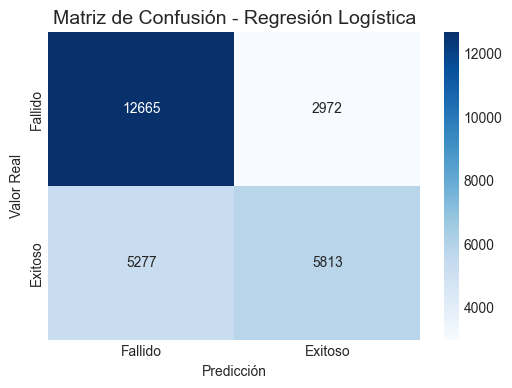


--- Entrenando y Evaluando: KNN ---
Accuracy: 0.7193
Precisión: 0.6722
Recall: 0.6316


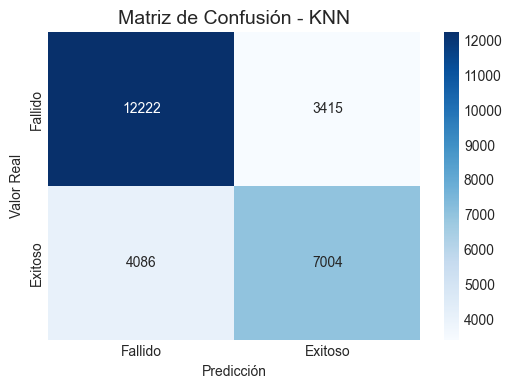


--- Entrenando y Evaluando: Árbol de Decisión ---
Accuracy: 0.7365
Precisión: 0.6993
Recall: 0.6404


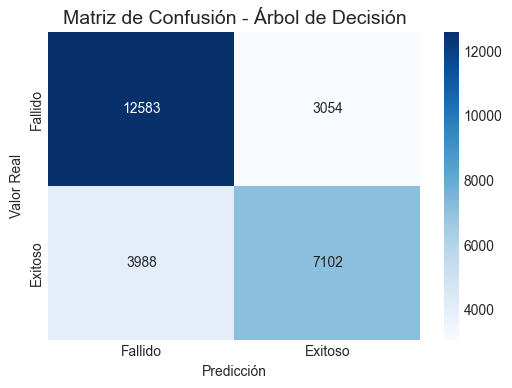


--- Entrenando y Evaluando: Random Forest (Opcional) ---
Accuracy: 0.7126
Precisión: 0.7517
Recall: 0.4591


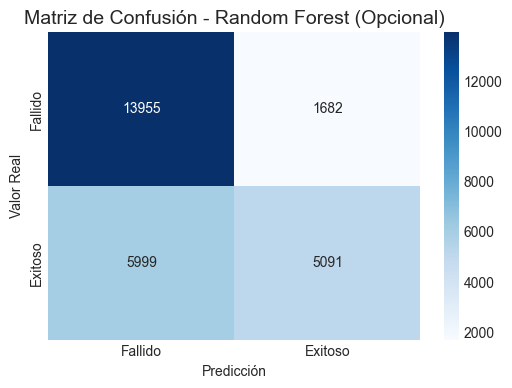

In [126]:
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest (Opcional)": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

# Diccionario para guardar los resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\n--- Entrenando y Evaluando: {name} ---")
    
    # Crear el pipeline completo: preprocesador + modelo
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model)])
    
    # Entrenar
    clf_pipeline.fit(X_train, y_train)
    
    # Predecir
    y_pred = clf_pipeline.predict(X_test)
    
    # Evaluar
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'cm': cm}
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Graficar Matriz de Confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallido', 'Exitoso'], yticklabels=['Fallido', 'Exitoso'])
    plt.title(f'Matriz de Confusión - {name}', fontsize=14)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

Respuestas: